### Personal Insuarance Prediction
Insurance premium and assured ammount largely depends on lifestyle and existing health condion of an individual. The data contains following information about people and their related insurance charges.

Columns

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Renuka DJ\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df=pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Understanding Data

In [4]:
#Data dimensions
r,c=df.shape
print(f"The data has {r} rows and {c} columns.")

The data has 1338 rows and 7 columns.


In [7]:
#Checking data types
cat_cols=df.select_dtypes(exclude=np.number).columns
num_cols=df.select_dtypes(include=np.number).columns
print(f"There are {len(cat_cols)} categorical columns in data.\nThey are:\n {cat_cols}\n")
print(f"There are {len(num_cols)} numerical columns in data.\nThey are:\n {num_cols}")

There are 3 categorical columns in data.
They are:
 Index(['sex', 'smoker', 'region'], dtype='object')

There are 4 numerical columns in data.
They are:
 Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
#Descriptive Statistics

In [9]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Observations:

1. Average age of individuals is about 39 years with a standard deviation of 14 years. Age range being considered is 18-64 years.
2. Average BMI is nearly 30. 
3. Most individuals have one child.
4. Distribution of data for Age, BMI & Child is near normal. For charges it is right skewed.
5. Upto 50% individuals are charged around 9382.9033

In [10]:
df.describe(exclude=np.number)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


Observations: 

1. The data is balanced with respect to gender. Number of males is slightly more. 
2. Most individuals are non smokers.
3. Out of the 4 unique regions covered in the data most belong to the SouthEast region. 

In [15]:
df2=pd.get_dummies(df,drop_first=True)

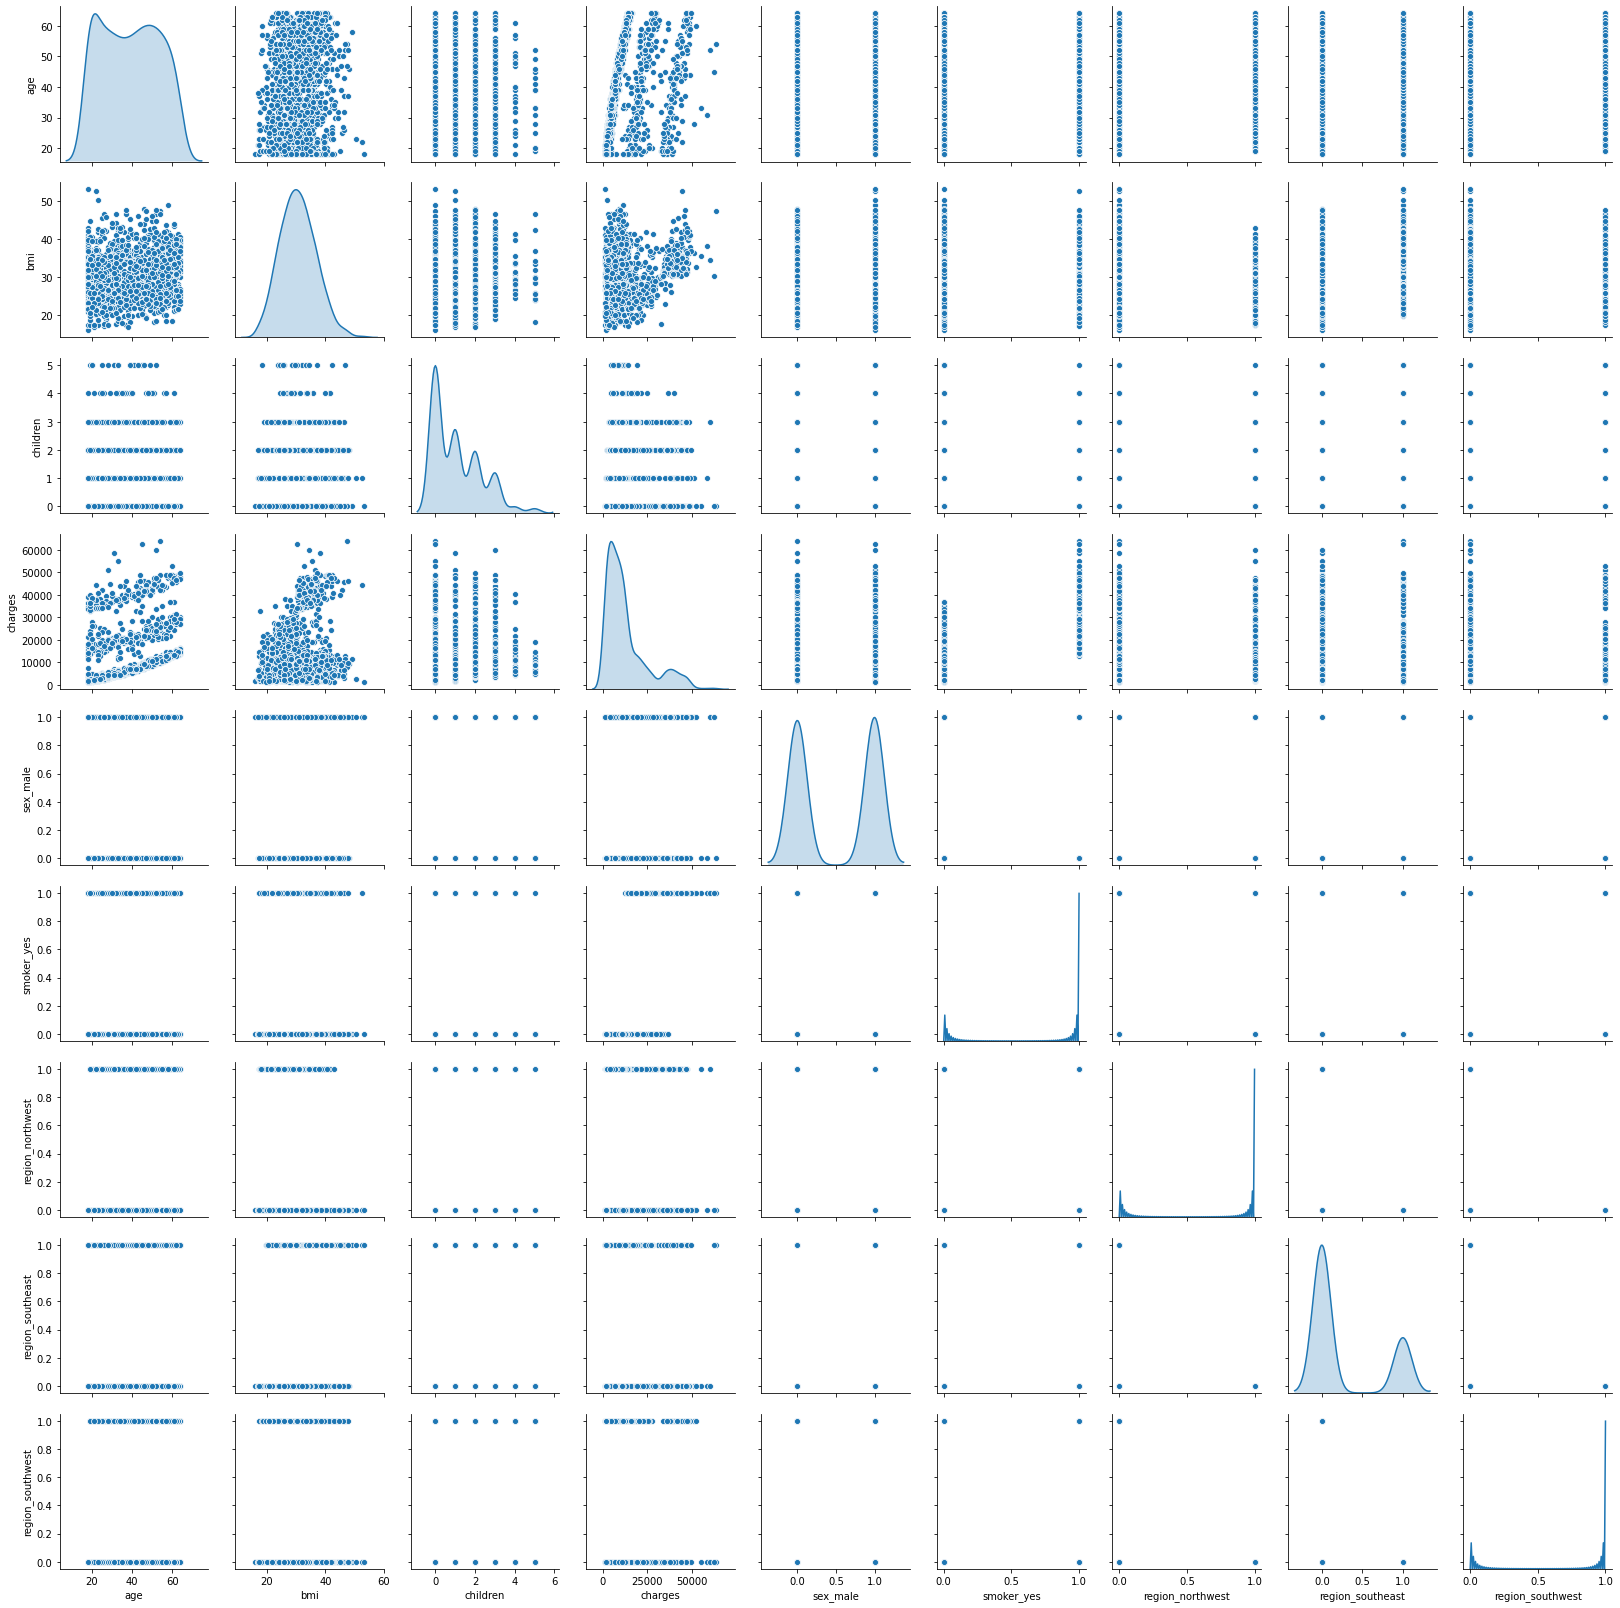

In [16]:
sns.pairplot(df2, diag_kind='kde')

Observations: 

1. Charges Vs Age: We can observe that individuals can be linearly separated based on age and charges. 
2. There seems to be some linearity in relationship of charges with BMI

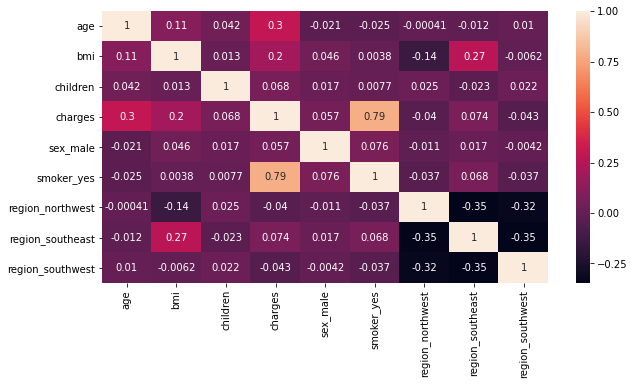

In [17]:
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True)

Observations: 

1. There is some correlation between charges and age.
2. Smoker status yes has high correlation with Insurance charges.

### Data Preprocessing

In [18]:
#Scaling Data
X=df2.drop('charges',axis=1)
y=df2['charges']
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inp_sc=sc.fit_transform(X)
inp_sc=pd.DataFrame(inp_sc,columns=X.columns)

In [19]:
inp_sc.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418


### Model Building

#### Linear Regression: OLS based model

In [29]:
import statsmodels.api as sm
c=sm.add_constant(inp_sc)
ols=sm.OLS(y,X)
mod=ols.fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.874
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1158.
Date:                Mon, 28 Dec 2020   Prob (F-statistic):                        0.00
Time:                        12:09:22   Log-Likelihood:                         -13618.
No. Observations:                1338   AIC:                                  2.725e+04
Df Residuals:                    1330   BIC:                                  2.729e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
age                203.0019     11.619     17.471      0.000     180.208     225.796
bmi                 69.2858     18.815      3.683      0.000      32.376     106.196
children           289.0531    144.213      2.004      0.045       6.144     571.962
sex_male          -665.6124    347.528     -1.915      0.056   -1347.376      16.151
smoker_yes        2.337e+04    433.137     53.966      0.000    2.25e+04    2.42e+04
region_northwest -1736.0707    486.883     -3.566      0.000   -2691.213    -780.928
region_southeast -1281.8646    503.664     -2.545      0.011   -2269.926    -293.803
region_southwest -1950.0825    495.875     -3.933      0.000   -2922.864    -977.301
==============================================================================
Omnibus:                      275.143   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              642.991
Skew:                           1.123   Prob(JB):                    2.38e-140
Kurtosis:                       5.548   Cond. No.                         206.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Checking Assumptions

In [33]:
#Multicollinearity: 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp_sc.values,i) for i in range(inp_sc.shape[1])]
vif['Feature']=inp_sc.columns
vif.sort_values('VIF',ascending=False)

,VIF,Feature
6,1.652230,region_southeast
7,1.529411,region_southwest
5,1.518823,region_northwest
1,1.106630,bmi
0,1.016822,age
4,1.012074,smoker_yes
3,1.008900,sex_male
2,1.004011,children


Observation: 
    No problem of multicollinearity

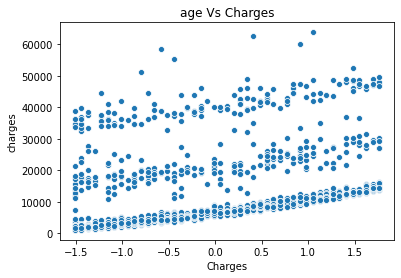

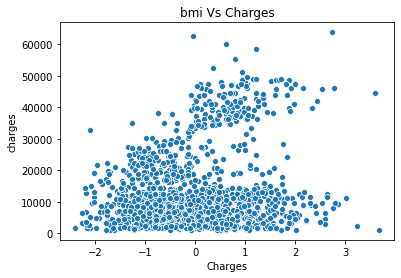

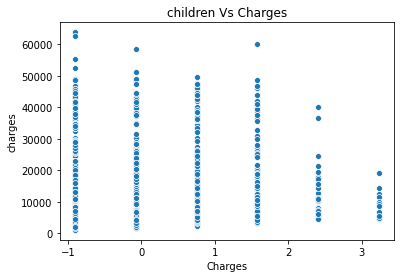

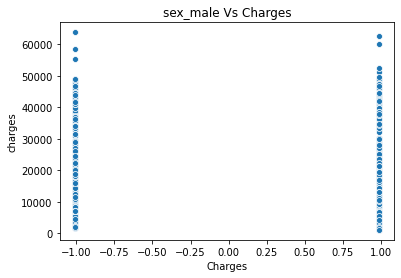

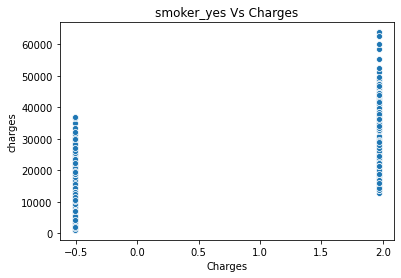

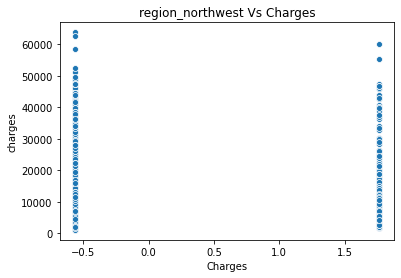

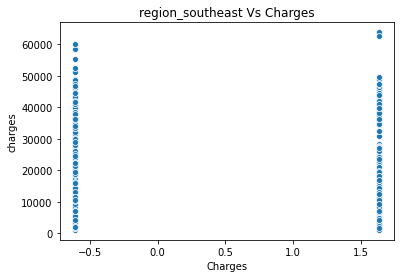

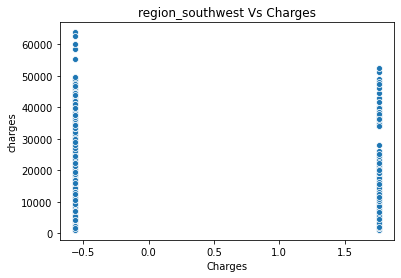

In [34]:
#Linearity:
for i in inp_sc.columns:
    sns.scatterplot(inp_sc[i],y)
    plt.xlabel(f"{i}")
    plt.xlabel(f"Charges")
    plt.title(f"{i} Vs Charges")
    plt.show()

Observations:

1. Linear relationship between age and charges
2. Some linearity for BMI vs Charges. 
3. Observable difference in charges for smokers and non smokers. 

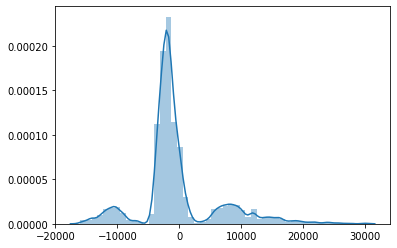

In [36]:
#Normality: 
sns.distplot(mod.resid)

Observation: 
Near normal distribution of residues.

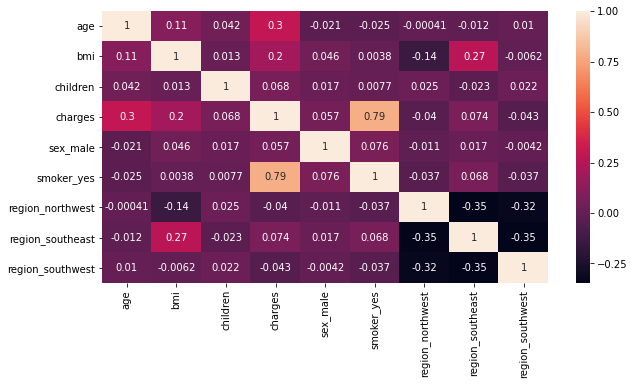

In [37]:
#Autocorrelation
plt.figure(figsize=(10,5))
sns.heatmap(df2.corr(), annot=True)

Observation: 

No/low observable autocorrelation among input features

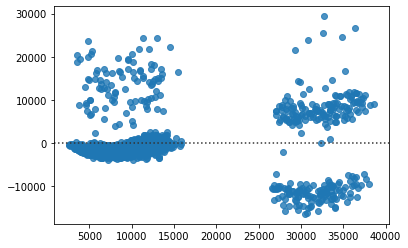

In [41]:
#Homoscadasticity: ypred vs error
sns.residplot(mod.predict(),mod.resid)


In [42]:
from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(mod.resid,mod.model.exog)

(0.9680213808404874, 0.6618923495122399, 'increasing')

Observation: 

Since the p values > 0.05,  We accept the null hypothesis 
ie. The variance among the residues and predicted values are same.
Therefore the model satisfies the condition of homoscadasticity.

#### Linear Regression: Sklearn based model

In [21]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inp_sc, y, test_size=0.3, random_state=42)

In [47]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred_train=lr.predict(X_train)
y_pred_test=lr.predict(X_test)

In [52]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
print("Training stage characteristics\n")
print("Accuracy of model: ", r2_score(y_train,y_pred_train))
print("Mean Absolute Error of model: ", mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error of model: ", mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("\n\nTesting stage characteristics\n")
print("Accuracy of model: ", r2_score(y_test,y_pred_test))
print("Mean Absolute Error of model: ", mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error of model: ", mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training stage characteristics

Accuracy of model:  0.742398009060026
Mean Absolute Error of model:  4251.255798614485
Mean Squared Error of model:  37730549.72357765
Root Mean Squared Error of model:  6142.519818737067


Testing stage characteristics

Accuracy of model:  0.769611805436901
Mean Absolute Error of model:  4145.450555627598
Mean Squared Error of model:  33780509.574791655
Root Mean Squared Error of model:  5812.100272258872


##### Note: Ignore R2 Scores for non-linear models. 

In [61]:
# Based on relationship between age and charges, trying KNN Regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor(n_neighbors=100,weights='distance')

knn.fit(X_train,y_train)
y_pred_train=knn.predict(X_train)
y_pred_test=knn.predict(X_test)

In [60]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
print("Training stage characteristics\n")
print("Accuracy of model: ", r2_score(y_train,y_pred_train))
print("Mean Absolute Error of model: ", mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error of model: ", mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("\n\nTesting stage characteristics\n")
print("Accuracy of model: ", r2_score(y_test,y_pred_test))
print("Mean Absolute Error of model: ", mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error of model: ", mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training stage characteristics

Accuracy of model:  1.0
Mean Absolute Error of model:  0.0
Mean Squared Error of model:  0.0
Root Mean Squared Error of model:  0.0


Testing stage characteristics

Accuracy of model:  0.655394189327184
Mean Absolute Error of model:  4415.087548416884
Mean Squared Error of model:  50527588.48619591
Root Mean Squared Error of model:  7108.276055851792


In [62]:
# Trying non linear ensemble model to see if there is any improvement in performance


In [65]:
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(X_train,y_train)
y_pred_train=rfc.predict(X_train)
y_pred_test=rfc.predict(X_test)

In [66]:
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
print("Training stage characteristics\n")
print("Accuracy of model: ", r2_score(y_train,y_pred_train))
print("Mean Absolute Error of model: ", mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error of model: ", mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("\n\nTesting stage characteristics\n")
print("Accuracy of model: ", r2_score(y_test,y_pred_test))
print("Mean Absolute Error of model: ", mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error of model: ", mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training stage characteristics

Accuracy of model:  0.9766699405188695
Mean Absolute Error of model:  1082.5012060304489
Mean Squared Error of model:  3417116.327769126
Root Mean Squared Error of model:  1848.5443807950962


Testing stage characteristics

Accuracy of model:  0.8529257355554875
Mean Absolute Error of model:  2661.2898711430357
Mean Squared Error of model:  21564662.233214326
Root Mean Squared Error of model:  4643.776720861408


Observation: 

While the prediction accuracy of the model has increased the resultant model is overfitting in nature. 
Next we will try to improve for this model. 

In [117]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
rfc=RandomForestRegressor()
grid={'criterion':['mse', 'mae']}
gc=GridSearchCV(rfc,param_grid=grid, cv=10, scoring='neg_mean_squared_error')
gc.fit(inp_sc,y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae']},
             scoring='neg_mean_squared_error')

In [118]:
gc.best_params_

{'criterion': 'mse'}

In [119]:
y_pred_train=gc.predict(X_train)
y_pred_test=gc.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
print("Training stage characteristics\n")
print("Accuracy of model: ", r2_score(y_train,y_pred_train))
print("Mean Absolute Error of model: ", mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error of model: ", mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("\n\nTesting stage characteristics\n")
print("Accuracy of model: ", r2_score(y_test,y_pred_test))
print("Mean Absolute Error of model: ", mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error of model: ", mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training stage characteristics

Accuracy of model:  0.9750389974263372
Mean Absolute Error of model:  1042.0055440506987
Mean Squared Error of model:  3655997.942094277
Root Mean Squared Error of model:  1912.0664062982428


Testing stage characteristics

Accuracy of model:  0.9783086744859721
Mean Absolute Error of model:  942.6603633851616
Mean Squared Error of model:  3180475.590800532
Root Mean Squared Error of model:  1783.3887940660982


In [113]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
ab=AdaBoostRegressor()
grid={'learning_rate':[0.001,0.01,0.1,1, 2,5,10,30], 'random_state': [20]}
gc=GridSearchCV(ab,param_grid=grid,cv=10,scoring='neg_mean_squared_error')
gc.fit(inp_sc,y)

GridSearchCV(cv=10, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 2, 5, 10, 30],
                         'random_state': [20]},
             scoring='neg_mean_squared_error')

In [114]:
y_pred_train=gc.predict(X_train)
y_pred_test=gc.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
print("Training stage characteristics\n")
print("Accuracy of model: ", r2_score(y_train,y_pred_train))
print("Mean Absolute Error of model: ", mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error of model: ", mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("\n\nTesting stage characteristics\n")
print("Accuracy of model: ", r2_score(y_test,y_pred_test))
print("Mean Absolute Error of model: ", mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error of model: ", mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training stage characteristics

Accuracy of model:  0.857762994882916
Mean Absolute Error of model:  2829.5737764617083
Mean Squared Error of model:  20833225.60714773
Root Mean Squared Error of model:  4564.342845048752


Testing stage characteristics

Accuracy of model:  0.8727406161320925
Mean Absolute Error of model:  2707.013325367525
Mean Squared Error of model:  18659319.082664847
Root Mean Squared Error of model:  4319.643397627268


In [111]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
gb=GradientBoostingRegressor()
grid={'learning_rate':[0.001,0.01,0.1,1, 2,5,10,30], 'random_state': [20]}
gc=GridSearchCV(gb,param_grid=grid,cv=10,scoring='neg_mean_squared_error')
gc.fit(inp_sc,y)

C:\Users\Renuka DJ\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1, 2, 5, 10, 30],
                         'random_state': [20]},
             scoring='neg_mean_squared_error')

In [112]:
y_pred_train=gc.predict(X_train)
y_pred_test=gc.predict(X_test)
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
print("Training stage characteristics\n")
print("Accuracy of model: ", r2_score(y_train,y_pred_train))
print("Mean Absolute Error of model: ", mean_absolute_error(y_train,y_pred_train))
print("Mean Squared Error of model: ", mean_squared_error(y_train,y_pred_train))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_train,y_pred_train)))
print("\n\nTesting stage characteristics\n")
print("Accuracy of model: ", r2_score(y_test,y_pred_test))
print("Mean Absolute Error of model: ", mean_absolute_error(y_test,y_pred_test))
print("Mean Squared Error of model: ", mean_squared_error(y_test,y_pred_test))
print("Root Mean Squared Error of model: ", np.sqrt(mean_squared_error(y_test,y_pred_test)))

Training stage characteristics

Accuracy of model:  0.8930762349365748
Mean Absolute Error of model:  2156.683539902689
Mean Squared Error of model:  15660952.074309703
Root Mean Squared Error of model:  3957.3920799321495


Testing stage characteristics

Accuracy of model:  0.9120697518908083
Mean Absolute Error of model:  1958.874667674688
Mean Squared Error of model:  12892711.771969026
Root Mean Squared Error of model:  3590.6422506243957


In [103]:
#Trying all models at once
models=[]
models.append(('Linear Regression',lr))
models.append(('KNN',knn))
models.append(('RandomForest',rfc))
models.append(('AdaBoost',ab))
models.append(('GradientBoost',gb))

In [120]:
model_name=[]
scores=[]
for name,model in models: 
    kfold=KFold(n_splits=10, shuffle=True, random_state=20)
    score=cross_val_score(model,inp_sc,y, cv=kfold, scoring='neg_mean_squared_error')
    model_name.append(name)
    scores.append(score)
    print(f"{name}, bias: {np.mean(1-score)}, Variance error: {np.var(score,ddof=1)}")
         

Linear Regression, bias: 37000007.62728684, Variance error: 31004517744006.19
KNN, bias: 48085531.58878967, Variance error: 100759926356851.97
RandomForest, bias: 24102324.01952535, Variance error: 23582397454813.17
AdaBoost, bias: 26791430.513492636, Variance error: 15360429024167.693
GradientBoost, bias: 20751822.888221215, Variance error: 27885222067243.723


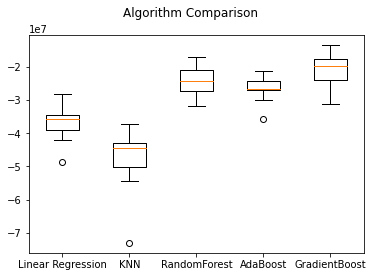

In [121]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(model_name)
plt.show()

Interpretation: 

1. Non-linear models perform better at predicting the insurance charges. 
2. Gradient boosting Algorithm give the lowest bias error at expense of slightly more variance error as compared with other ensemble models. 
3. Random Forest Regressor give the best balance between the bias and variance error. So we will proceed with these algorithms to check if the combinationn of ensemble model gives a better result. 


In [124]:
from sklearn.ensemble import VotingRegressor
va=VotingRegressor(estimators=[('RandomForest',rfc),('AdaBoost',ab),('GradientBoost',gb)])
models=[]
models.append(('Linear Regression',lr))
models.append(('KNN',knn))
models.append(('RandomForest',rfc))
models.append(('AdaBoost',ab))
models.append(('GradientBoost',gb))
models.append(('VotingAlgo',va))


In [125]:
model_name=[]
scores=[]
for name,model in models: 
    kfold=KFold(n_splits=10, shuffle=True, random_state=20)
    score=cross_val_score(model,inp_sc,y, cv=kfold, scoring='neg_mean_squared_error')
    model_name.append(name)
    scores.append(score)
    print(f"{name}, bias: {np.mean(1-score)}, Variance error: {np.var(score,ddof=1)}")
         

Linear Regression, bias: 37000007.62728684, Variance error: 31004517744006.19
KNN, bias: 48085531.58878967, Variance error: 100759926356851.97
RandomForest, bias: 23768894.555550642, Variance error: 24702232687753.38
AdaBoost, bias: 26592162.614636634, Variance error: 19321661558034.703
GradientBoost, bias: 20756057.554895118, Variance error: 27841219031032.113
VotingAlgo, bias: 21512671.237472028, Variance error: 23605567765107.992


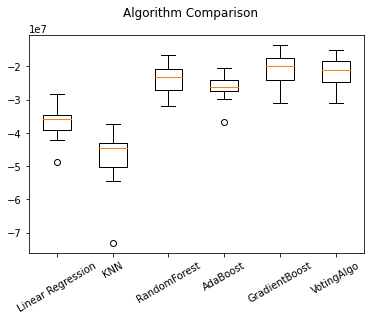

In [127]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(scores)
ax.set_xticklabels(model_name)
plt.xticks(rotation=30)
plt.show()

Observation: 

As expected, the Voting Regressor provides a model with best features from the combination of ensemble model. This model gives comparable performanhce with better bias and variance error balance. We can proceed with this model for deployment.

### Future scope: 
Can create an app for such prediction